# MEE 340 Pump Design Final Project Report
## Project Members: Ben Pierce, Jonathan Mercado, Aidan Marshall, Alan Pensado
### Due Date: 12/3

#### Introduction
In this final project, we were tasked with finding an economical pipe size and pump impeller size and speed for a water pumping system to keep a 1-million-gallon capacity water tank filled. This tank is to be filled daily with rather chilly groundwater (10$ ^o $C) from an aquifer, which is 0.8 miles from the tank, and 150 feet lower than the tank. This pump is estimated to use 1.5 million gallons of water per day, and the time to fill the tank should not exceed 8 hours per day. This piping system should have four butterfly valves with variable openings, 10 elbows of various angles, and galvanized iron pipe of a size to be selected. 

#### Given
The design of this piping system should be economical in a capital and operating sense. We are given a modified version of the model 1206 centrifugal pump manufactured by Taco Inc. Below is test data provided by the company for a small model of the pump, with a diameter of 5.45 inches, angular velocity of 1760 revolutions per minute, and tested with water at 20$ ^o $C:

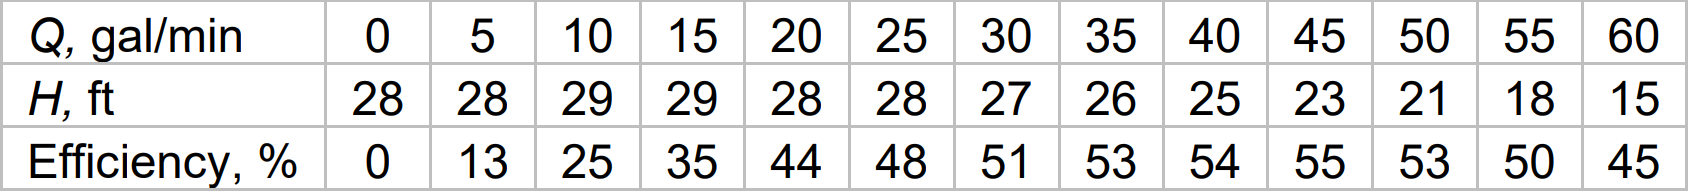

#### Analysis
With all the information given, we can start setting some variables with values for any calculations we'll need to perfom:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from math import pi
import handcalcs.render
import numpy as np
from math import pi
from pint import UnitRegistry
u=UnitRegistry(auto_reduce_dimensions=True)

In [16]:
Q = [0,5,10,15,20,25,30,35,40,45,50,55,60]*u.gal/u.min #Q, gal/min
H = [28,28,29,29,28,28,27,26,25,23,21,18,15]*u.ft #H, ft
eta = [0,13,25,35,44,48,51,53,54,55,53,50,45] #Efficiency, %
print('\n',Q,'\n','\n',H,'\n','\n',eta)


 [0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 50.0 55.0 60.0] gallon / minute 
 
 [28 28 29 29 28 28 27 26 25 23 21 18 15] foot 
 
 [0, 13, 25, 35, 44, 48, 51, 53, 54, 55, 53, 50, 45]


In [17]:
%%render
V_r = 1500000/8*u.gal/u.hour #volume flow rate in gallons per hour

h = 150*u.ft #height of tank
T = 283.15*u.degK #temperature converted from degrees Celcius to degrees Kelvin
model_d = 5.45*u.inch #given pump diameter in inches
omega = 1760/u.min #given angular velocity in revolutions per minute
rho = 1000 #Density of water
l = 1287.48 #should be 0.8 miles converted to meters
mu = 0.0010028 #Viscosity of water at 10 degrees Celcius
vel = 0.9727351178097775 #Result from converting velocity to m/s
g = 9.81 #Acceleration due to gravity
d = 0.508 #Our pipe diameter in meters
A = pi*d**2/4 #Area of a circle using our diamter

epsilon = 0.15 #roughness per mm of pipe diameter from Moody chart
D = d*10**3 #convert meter diameter to mm
rough = epsilon/D #should give roughness of pipe

Vol_h2o_day = 1.5e6*u.gallons #gallons to pump per day
time_pump = 8*u.hour #time to pump per day
Q_h2o = Vol_h2o_day/time_pump #flow rate while pumping
d_p = 0.508*u.m #impellor diameter test
Area = np.pi*d_p**2/4 #pump area
vel_avg = Q_h2o/Area #average velocity of water leaving pump

<IPython.core.display.Latex object>

In [18]:
print(f'average velocity test {vel_avg.to(u.m/u.s)}')

average velocity test 0.9727351178097775 meter / second


For our velocity in any equations moving forward, we will be using this __0.9727351178097775__ $\frac{m}{s}$

<br><br>Given the volume flow rate, height, and effeciency, we can plot these and we find:<br><br>

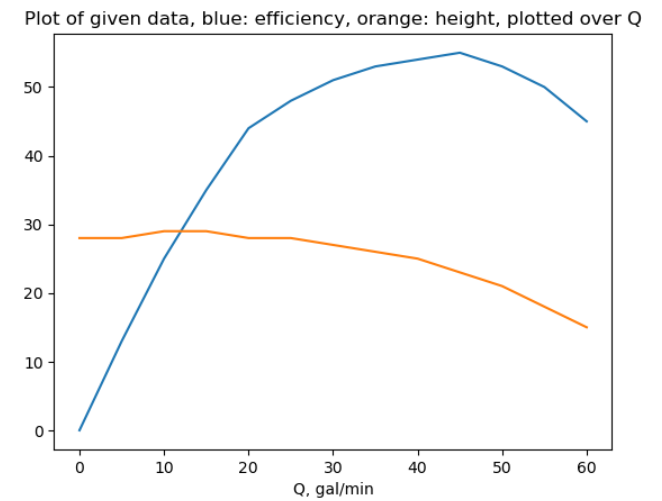

<br><br>However, our volume flow rate is in gallons per minute and our height is given in feet, and since we are tasked with finding all our unknowns in nondimensional form, we must convert volume flux and height into dimensionless values. In the final project prompt, we are given the following: <br><br>
$$ \text{dimensionless volume flow rate} = \frac{Q}{\Omega D^3} \quad \quad \quad \text{dimensionless pressure} = \frac{Pressure}{\rho \Omega ^2 D^2} $$ <br><br>
Below is the work to nondimensionalize volume flow rate and pressure. When we nondimensionalize our given values and plot them as pressure over volume flow rate, we get the following graph:<br><br>

In [5]:
%%render
#trying dimensionless groups
Pi_Q = Q / (omega*model_d**3)
Pi_pres = g*H/(omega**2*model_d**2)

<IPython.core.display.Latex object>

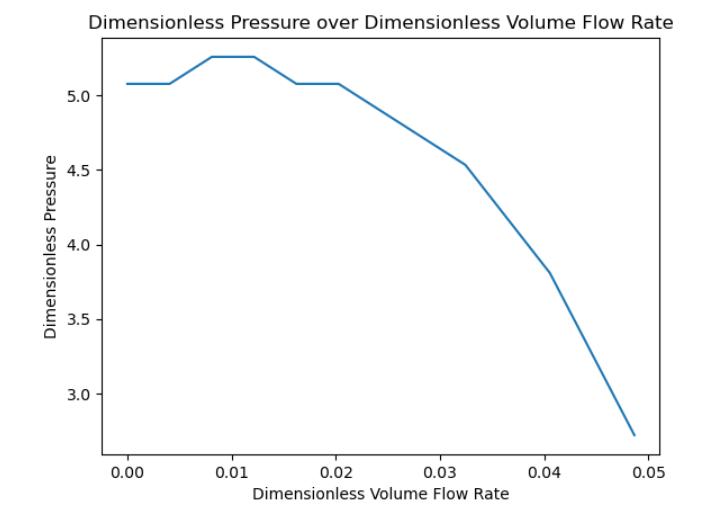

<br><br>Given that we must use 10 elbows of various angles, we did a simple Google search on what type of K values we would see with different degree elbows, with different radius to diameter ratios. The following table is the table we used for calculation purposes:<br><br>
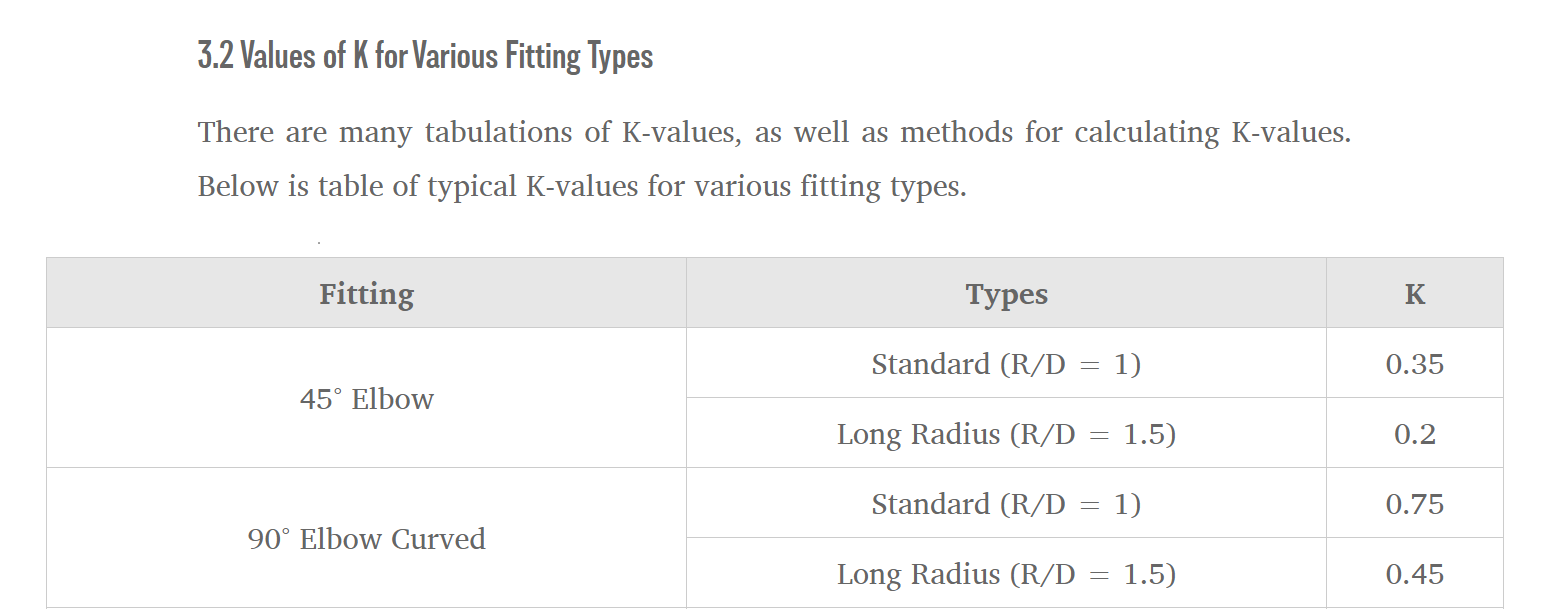

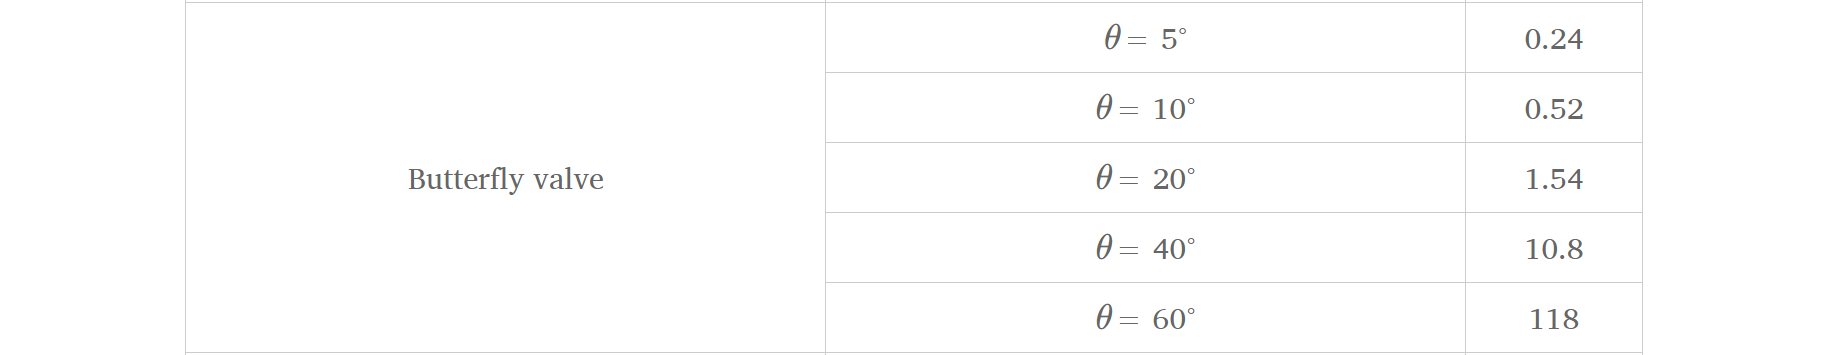

In [19]:
%%render

rho = 1000*u.kg/u.m**3 #Density of water
mu = 0.0010028*u.kg/u.m/u.s #Viscocity of water at 10 degrees Celcius
d = 0.508*u.m #Diamter of pipe (20 ft diameter converted to meters)
h = 150*u.ft #Height of tank
g=9.81*u.m/u.s**2 #Acceleration due to gravity
A = pi*d**2/4 #Area of a cross-sectional area of pipe given pipe radius
l = 0.8*u.mile+h #Distance from tank
Vol_h2o_day = 1.5e6*u.gallons #gallons to pump per day
time_pump = 8*u.hour #time to pump per day
Q_h2o = Vol_h2o_day/time_pump #flow rate while pumping

vel = Q_h2o/A #average velocity of water leaving pump

k_l1 = .24 #Butterfly valve with 5 degree angle K value
k_l2 = .52 #Butterfly valve with 10 degree angle K value
k_l3 = 1.54 #Butterfly valve with 20 degree angle K value
k_l4 = 10.8 #Butterfly valve with 40 degree angle K value
k_l90 = .75 #90 degree curved elbow with standard radius to diameter (R/D) ratio of 1 K value
k_l45 = .35 #45 degree elbow with standard radius to diameter (R/D) ratio of 1 K value
hlv = (vel**2)/(2*g)*(k_l1+k_l2+k_l3+k_l4+(5*k_l90)+(5*k_l45)) 
#Formula for Minor Headloss, and takes into account 1 of each butterfly with 5, 10, 20, and 40 degree angle

Re = rho*d*vel/mu #Equation to find Reynolds number
f = 0.035 #Friction factor
hlm = f*l/d*(vel)**2/2/g #Major Headloss
hl = hlv + hlm #Total headloss

<IPython.core.display.Latex object>

In [21]:
vel.to(u.m/u.s)

0.9727351178097775 <Unit('meter / second')>

In [7]:
%%render
h_pump = h + hl

<IPython.core.display.Latex object>

Now that we have much of the information we'll need to start finding an economical pipe size, pump impeller size, and speed for this task, we need to consider costs before making our final calculations. <br><br><br>
From the assignment sheet, we see that Taco Inc. has provided the following cost estimates for system components:

Pump and motor: $ \$ $3500 plus $ \$ $1500 per inch of impeller size<br>
Pump speed: Between 900 and 1800 r/min<br>
Valves: $ \$ $300 + $ \$ $200 per inch of pipe size<br>
Elbows: $ \$ $50 plus $ \$ $50 per inch of pipe size <br>
Pipes: $ \$ $ 1 per inch of diameter per foot of length<br>
Electricity Cost: 10¢ per kilowatt-hour <br><br>

With this, we can make our final calculations to find our pump cost, cost to run it for 10 years, cost of installation, and our pump radius in feet. It is important to note that these calculation include all of our values, but converted to American units given that all the costs are measured in American units. Another thing to note is that we made the assumption that because this pipe system is covering so much, it is 150 feet tall and spans nearly a whole mile, that the implementation of any pump valves or elbows would not add any significant length to the whole system, thus our calculations for the total pipe used is simply the whole distance the pipe covers, the 150 feet and 0.8 miles. And our conversion used from ChatGPT is also given below: 

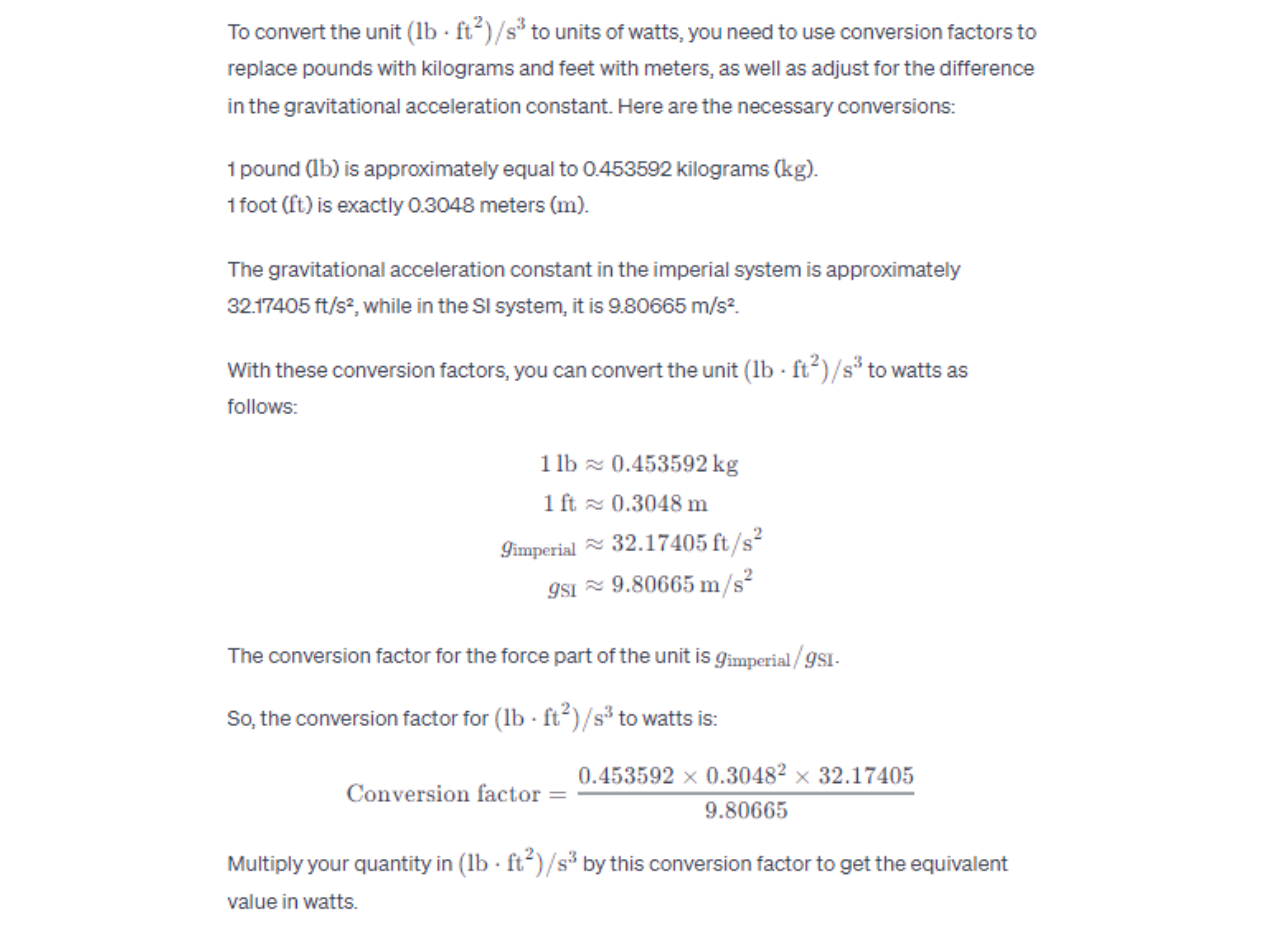

In [8]:
d = 20 #Diamter of our pipe in inch
h = 150 #Length of our pipe in feet
l = 4224+150 #Total length of our pipe including the 0.8 miles, converted to feet
elbow_cost = ((50*d)+50)*10 #Elbow cost given by Taco Inc.
valve_cost = ((200*d)+300)*4 #Valve cost given by Taco Inc.
pipe_costtotal = 1*d*l #Cost of all the pipe we'll need, the total length of the pipe and the diameter of the pipe
total_cost = pipe_costtotal+elbow_cost+valve_cost #Total cost of all the pipe, including all the pipe and the cost of all the elbows and butterfly valves
d_list = [d] 
cost_list= [total_cost] 

rho = 62.4 # Density of water in lbs per foot cubic
D = d/12 #Diameter of our pipe in feet
Q = 6.96 #Volume flow rate in cubic feet per second, from 1.5 million gallons of water in 8 hours, or 187500 gallons per hour
A = pi*D**2/4 #Area of a circle, in feet squared
vel = Q/A #Velocity in feet per second
g = 32.2 #Gravity feet per second squared
hlv = (vel**2)/(2*g)*(k_l1+k_l2+k_l3+k_l4+(5*k_l90)+(5*k_l45)) #Minor Head loss in American units
hlm = f*l/D*(vel)**2/2/g  #Major Headloss in American units
hl = hlv + hlm #Total Headloss in American units
eta = .51 #Average efficiency from taco Inc.'s given data

h_list = [hl]

p_pump = (h + hl) * rho * g #lbs per foot sec squared

power = p_pump * Q #lbs ft^2 / s^3

power_watt = power * (0.138) #convert to watts with chat gpt conversion factor

omega = 1400/60 #Angular velocity
r = (3*omega*Q/pi)**(1/3) #Radius of pump in feet/pump size

cost_perday = power_watt*8*.1*365/eta #cost per year to run pump
pump_cost = 3500+(1500*(r*12))

print('Pump Cost: $', pump_cost)

opcost_list = [cost_perday]
print('Cost to run for 10 years: $',cost_perday*10, '\nCost of instalation: $', total_cost + pump_cost)
print(r, ': Pump size, or pump radius in feet')


Pump Cost: $ 100207.08826846992
Cost to run for 10 years: $ 1850297701.372012 
Cost of instalation: $ 215387.0882684699
5.372616014914995 : Pump size, or pump radius in feet


### Final Results
Cost to install: $\$$ 215,000 <br>
Cost to run for 10 years: $\$$1.85 billion <br>
Impeller Radius (in feet): 5.372 feet <br>
Pump Size (or pump radius): 5.373 feet <br>
Pump Speed: 6.96 cubic feet per second

### Limitations

Some limitations we can have are system characteristics, system resistance, and environmental conditions. The pump system we have is more theoretical and does not account for some minor losses, such as fluid viscosity, outside temperature, variations in manufacturer accesibility. Elevation change, pipe friction, wear and tare and other non smooth surfaces within the sytem over time can also be limitations.

### Conclusion and Final Results

In conclusion, our final project presented a comprehensive analysis and design process for an efficient water pumping system tasked with maintaining the water level in a 1 million gallon water tank. 

The systems requirements included pumping  groundwater from an aquifer located 0.8 miles away and 150 feet below the tank. The design we chose was derived from a version of Taco Inc.'s model 1206 centriugal pump, which provided excellent test data like impeller diameter, angular velocity and so on. through.

After all of our calculations and dimensional analysis:<br>
 - Our economical pump size was 20 inches. <br>
 - Our pump impeller size was 5.372 feet.<br>
 - Our pump size, or pump radius, was 5.373<br>
 
To help us finish the project, we converted a pump speed of 1.5 million gallons per day into cubic feet per minute, which would be around 6.963 cubic feet per second. So that we could fulfill the estimated daily use given in the prompt.

We found the cost to install this piping system to be around $ \$ $215,000. To run this for 10 years, it would cost around $ \$ $1.85 billion! 

The project's findings emphasize the importance of balancing engineering efficiency and economic considerations. Our design meets the requirements given, ensuring a reliable water pumping system. It also accounts for long term operational costs. 

Our system would look something like this: 
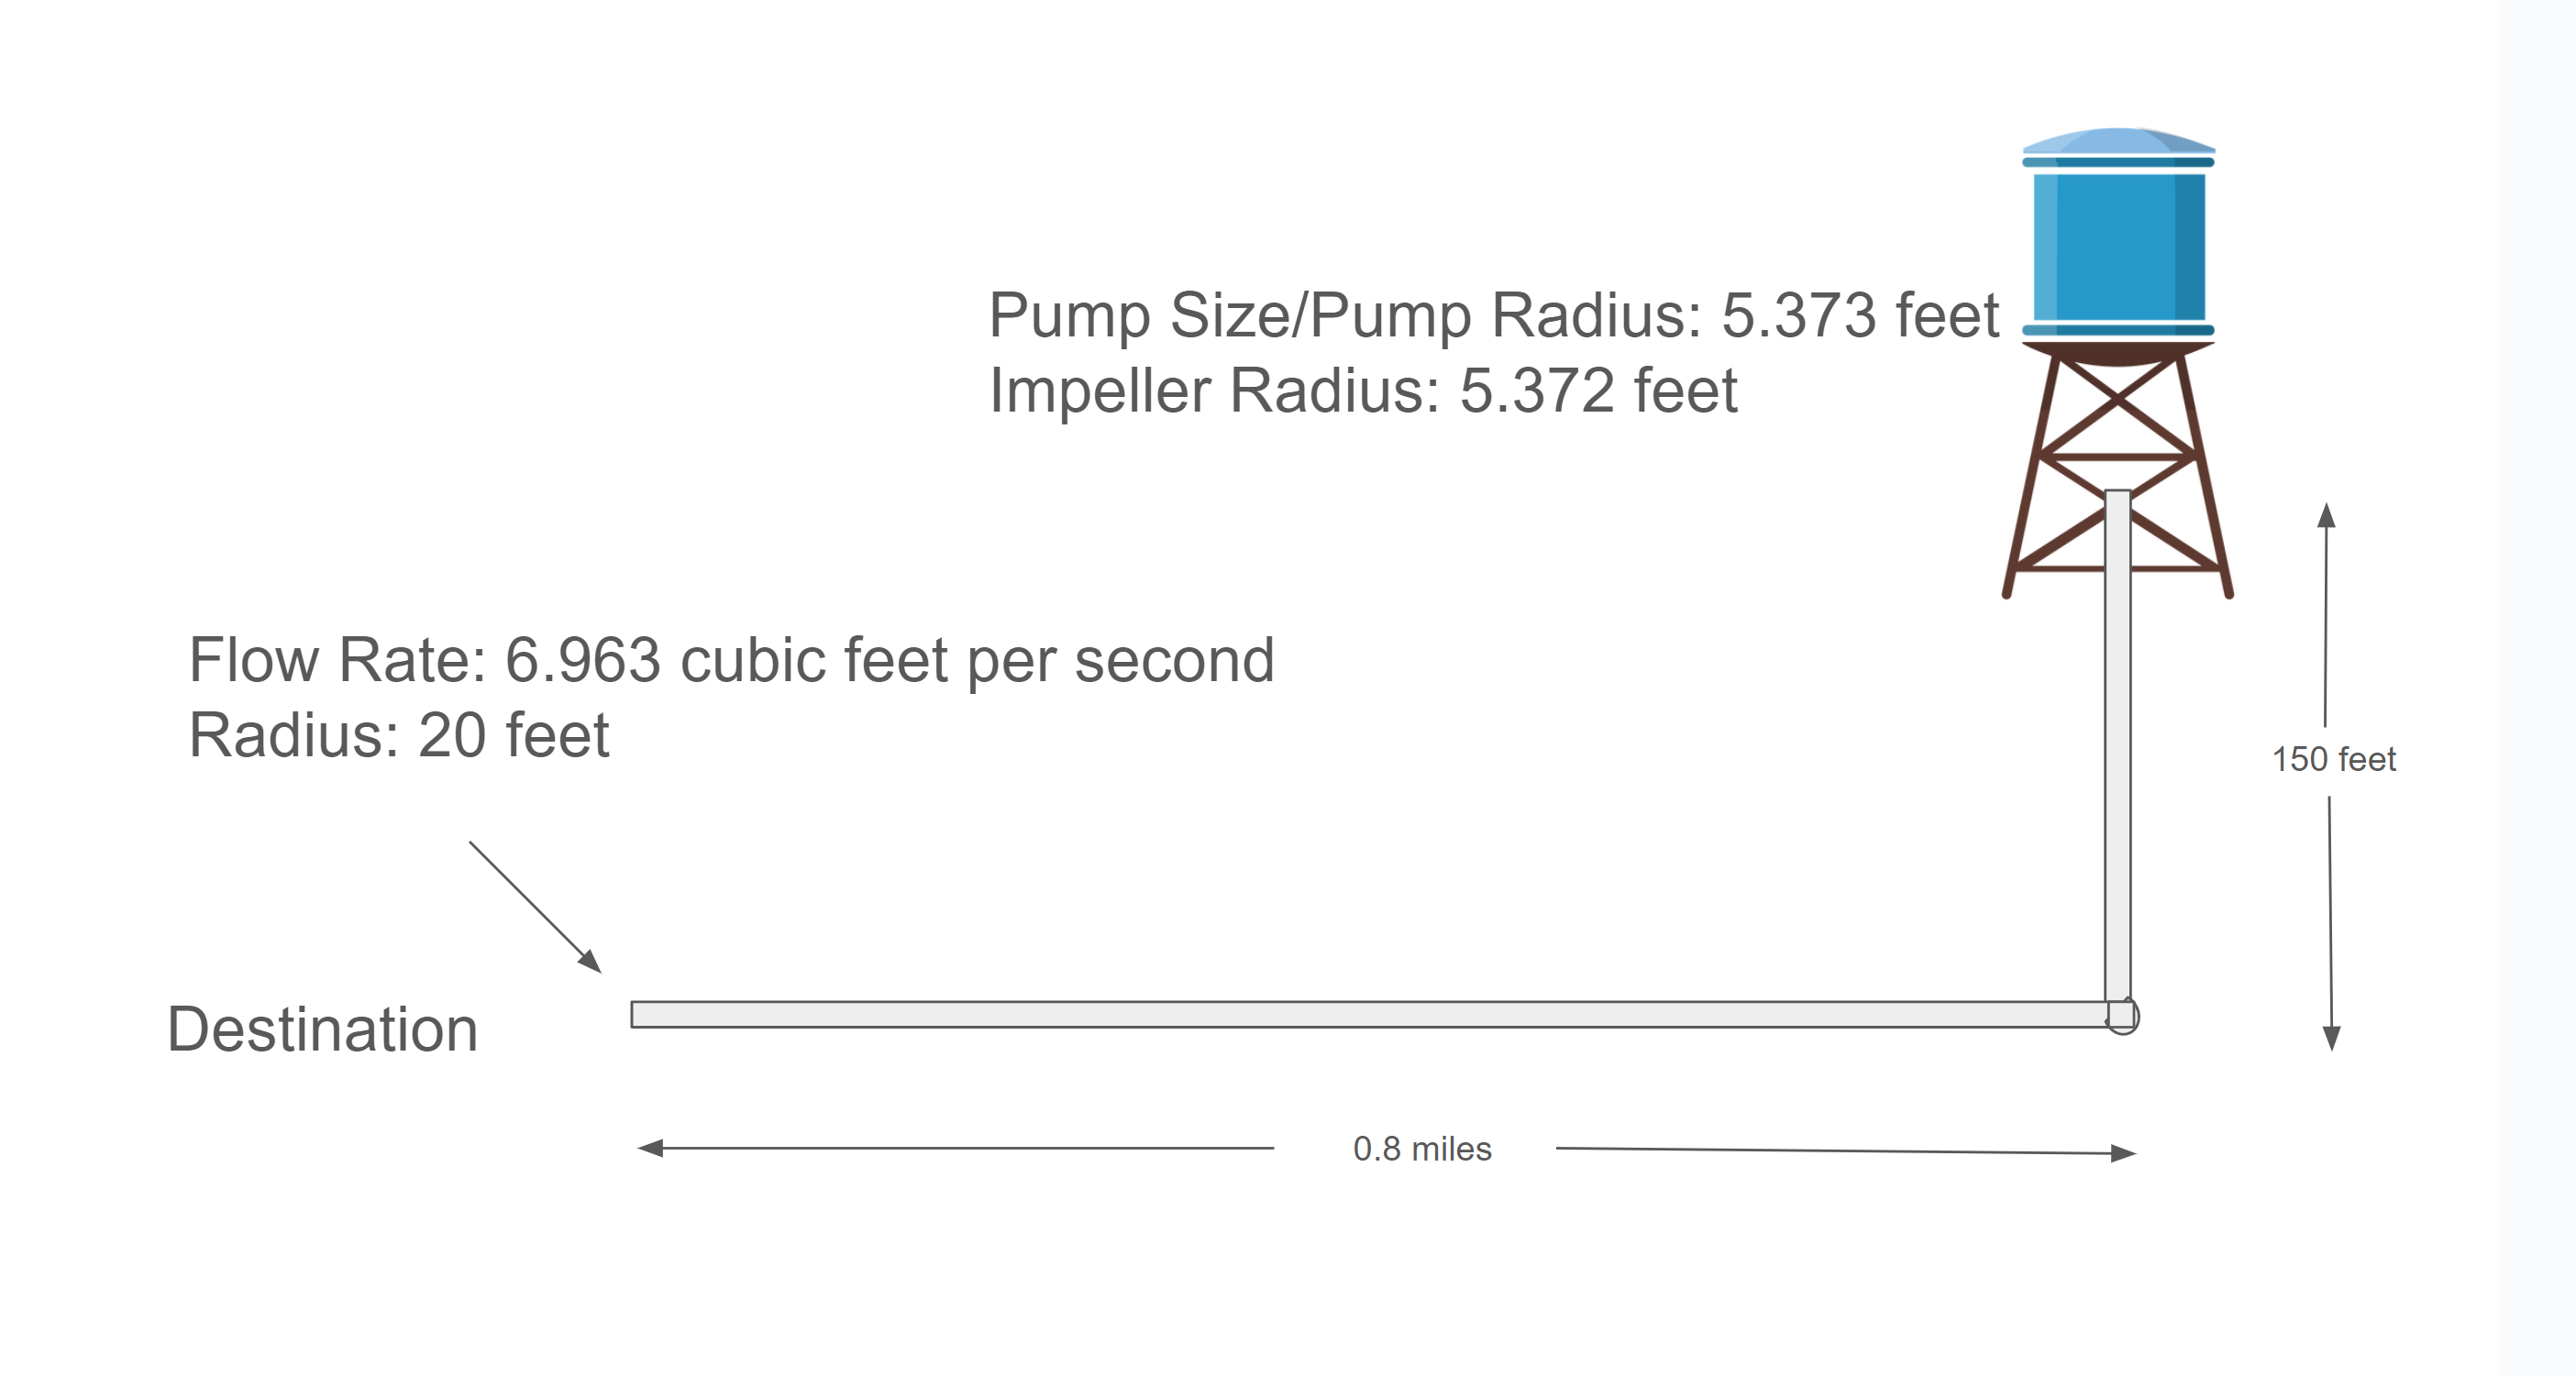